In [ ]:
# This makes a plot in the style of Fig. 1 in Pancino+ 2015, to 
# give readers a sense of the phase coverage of our program stars.

# created 2019 July 1 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# all program stars

cases = ["RW Ari", "X Ari", "UY Cam", "RR Cet", "SV Eri", "VX Her", "RR Leo", 
         "TT Lyn", "TV Lyn", "TW Lyn", "RR Lyr", "V535 Mon", "V445 Oph", "AV Peg", 
         "BH Peg", "AR Per", "RU Psc", "T Sex", "TU UMa", "All RRabs", "All RRcs"]

In [3]:
bad_phase_region = [0.90,0.05]
greyness_alpha = 0.3

In [4]:
cols = 3
rows = 7

In [5]:
# set the spacing between axes

#gs1 = gridspec.GridSpec(rows, cols)
#gs1.update(wspace=0.0, hspace=0.05) 

In [6]:
# define a normalization function

def normalize_curve(df_unnorm):
    '''
    Takes an unnormalized light curve (in flux units), turns it into delta_m, and and normalizes it
    '''

    y_del_mag = -2.5*np.log10(df_unnorm["flux"])
    
    y_mag_unnorm_offset = np.subtract(y_del_mag,np.min(y_del_mag))
    
    df_unnorm["y_mag_norm"] = np.divide(y_mag_unnorm_offset,np.max(y_mag_unnorm_offset))
    
    return df_unnorm

In [7]:
# read in data

df_rw_ari = pd.read_csv("./data/phase_folded_curves/Phased_RW_Ari.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_rr_cet = pd.read_csv("./data/phase_folded_curves/Phased_RR_Cet.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_sv_eri = pd.read_csv("./data/phase_folded_curves/Phased_SV_Eri.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_x_ari = pd.read_csv("./data/phase_folded_curves/Phased_X_Ari.dat", 
                       names=["epoch","flux"], delim_whitespace=True)
df_t_sex = pd.read_csv("./data/phase_folded_curves/T_Sex_phased.dat", 
                       names=["epoch","flux"], delim_whitespace=True)
df_uy_cam = pd.read_csv("./data/phase_folded_curves/Phased_UY_Cam.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_v535_mon = pd.read_csv("./data/phase_folded_curves/Phased_V0535_Mon.dat", 
                          names=["epoch","flux"], delim_whitespace=True)

In [8]:
df_ru_psc = pd.read_csv("./data/phase_folded_curves/RU_Psc_E.cur")

In [9]:
# normalize

df_rw_ari = normalize_curve(df_rw_ari)
df_rr_cet = normalize_curve(df_rr_cet)
df_sv_eri = normalize_curve(df_sv_eri)
df_x_ari = normalize_curve(df_x_ari)
df_t_sex = normalize_curve(df_t_sex)
df_uy_cam = normalize_curve(df_uy_cam)
df_v535_mon = normalize_curve(df_v535_mon)

In [10]:
df_t_sex

,epoch,flux,y_mag_norm
0,0.456048,18315.000,0.890621
1,0.460325,18227.004,0.907991
2,0.464603,18225.400,0.908308
3,0.468880,18162.445,0.920788
4,0.473157,18160.148,0.921244
...,...,...,...
13390,0.199235,21630.488,0.290544
13391,0.203512,21592.115,0.296948
13392,0.207786,21492.941,0.313551
13393,0.212063,21456.225,0.319718


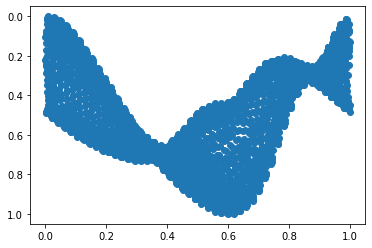

In [11]:
plt.scatter(df_v535_mon["epoch"],df_v535_mon["y_mag_norm"])
plt.gca().invert_yaxis()
plt.show()

In [14]:
# fake data

example_phase_epochs_star_1 = [0.1,0.45,0.77,0.98]
x = np.linspace(0,1.,num=50)
y = np.sin(x)

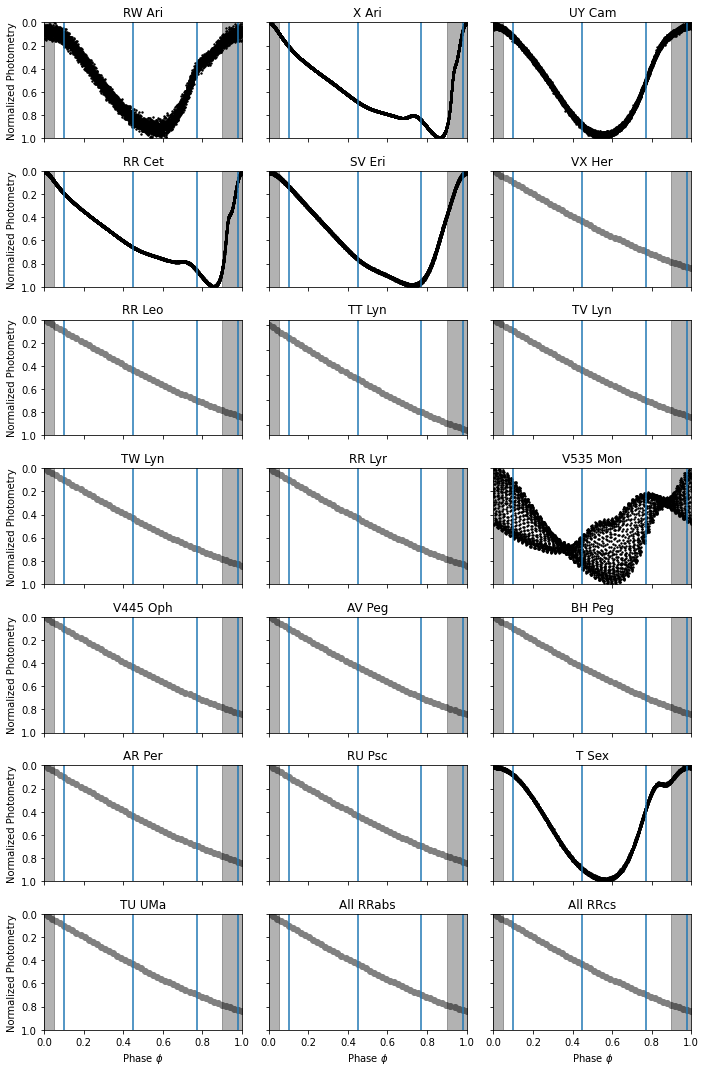

In [18]:
# used some code from 
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(rows, cols, figsize = (10, 15))

axs[0, 0].scatter(df_rw_ari["epoch"],df_rw_ari["y_mag_norm"], color="k", s=2)
axs[0, 0].set_title(cases[0])
[axs[0, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[0, 0].set_xlim([0,1.0])
axs[0, 0].set_ylim([0,1.0])
axs[0, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[0, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[0, 1].scatter(df_x_ari["epoch"],df_x_ari["y_mag_norm"], color="k", s=2)
axs[0, 1].set_title(cases[1])
[axs[0, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[0, 1].set_xlim([0,1.0])
axs[0, 1].set_ylim([0,1.0])
axs[0, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[0, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[0, 2].scatter(df_uy_cam["epoch"], df_uy_cam["y_mag_norm"], color="k", s=2)
axs[0, 2].set_title(cases[2])
[axs[0, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[0, 2].set_xlim([0,1.0])
axs[0, 2].set_ylim([0,1.0])
axs[0, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[0, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[1, 0].scatter(df_rr_cet["epoch"], df_rr_cet["y_mag_norm"], color="k", s=2)
axs[1, 0].set_title(cases[3])
[axs[1, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[1, 0].set_xlim([0,1.0])
axs[1, 0].set_ylim([0,1.0])
axs[1, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[1, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[1, 1].scatter(df_sv_eri["epoch"], df_sv_eri["y_mag_norm"], color="k", s=2)
axs[1, 1].set_title(cases[4])
[axs[1, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[1, 1].set_xlim([0,1.0])
axs[1, 1].set_ylim([0,1.0])
axs[1, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[1, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[1, 2].scatter(x, y, color="gray")
axs[1, 2].set_title(cases[5])
[axs[1, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[1, 2].set_xlim([0,1.0])
axs[1, 2].set_ylim([0,1.0])
axs[1, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[1, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[2, 0].scatter(x, y, color="gray")
axs[2, 0].set_title(cases[6])
[axs[2, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[2, 0].set_xlim([0,1.0])
axs[2, 0].set_ylim([0,1.0])
axs[2, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[2, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[2, 1].scatter(x, y, color="gray")
axs[2, 1].set_title(cases[7])
[axs[2, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[2, 1].set_xlim([0,1.0])
axs[0, 0].set_ylim([0,1.0])
axs[2, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[2, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[2, 2].scatter(x, y, color="gray")
axs[2, 2].set_title(cases[8])
[axs[2, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[2, 2].set_xlim([0,1.0])
axs[2, 2].set_ylim([0,1.0])
axs[2, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[2, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[3, 0].scatter(x, y, color="gray")
axs[3, 0].set_title(cases[9])
[axs[3, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[3, 0].set_xlim([0,1.0])
axs[3, 0].set_ylim([0,1.0])
axs[3, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[3, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[3, 1].scatter(x, y, color="gray")
axs[3, 1].set_title(cases[10])
[axs[3, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[3, 1].set_xlim([0,1.0])
axs[3, 1].set_ylim([0,1.0])
axs[3, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[3, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[3, 2].scatter(df_v535_mon["epoch"], df_v535_mon["y_mag_norm"], color="k", s=2)
axs[3, 2].set_title(cases[11])
[axs[3, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[3, 2].set_xlim([0,1.0])
axs[3, 2].set_ylim([0,1.0])
axs[3, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[3, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[4, 0].scatter(x, y, color="gray")
axs[4, 0].set_title(cases[12])
[axs[4, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[4, 0].set_xlim([0,1.0])
axs[4, 0].set_ylim([0,1.0])
axs[4, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[4, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[4, 1].scatter(x, y, color="gray")
axs[4, 1].set_title(cases[13])
[axs[4, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[4, 1].set_xlim([0,1.0])
axs[4, 1].set_ylim([0,1.0])
axs[4, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[4, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[4, 2].scatter(x, y, color="gray")
axs[4, 2].set_title(cases[14])
[axs[4, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[4, 2].set_xlim([0,1.0])
axs[4, 2].set_ylim([0,1.0])
axs[4, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[4, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[5, 0].scatter(x, y, color="gray")
axs[5, 0].set_title(cases[15])
[axs[5, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[5, 0].set_xlim([0,1.0])
axs[5, 0].set_ylim([0,1.0])
axs[5, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[5, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[5, 1].scatter(x, y, color="gray")
axs[5, 1].set_title(cases[16])
[axs[5, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[5, 1].set_xlim([0,1.0])
axs[5, 1].set_ylim([0,1.0])
axs[5, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[5, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[5, 2].scatter(df_t_sex["epoch"], df_t_sex["y_mag_norm"], color="k", s=2)
axs[5, 2].set_title(cases[17])
[axs[5, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[5, 2].set_xlim([0,1.0])
axs[5, 2].set_ylim([0,1.0])
axs[5, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[5, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[6, 0].scatter(x, y, color="gray")
axs[6, 0].set_title(cases[18])
[axs[6, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[6, 0].set_xlim([0,1.0])
axs[6, 0].set_ylim([0,1.0])
axs[6, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[6, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[6, 1].scatter(x, y, color="gray")
axs[6, 1].set_title(cases[19])
[axs[6, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[6, 1].set_xlim([0,1.0])
axs[6, 1].set_ylim([0,1.0])
axs[6, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[6, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

axs[6, 2].scatter(x, y, color="gray")
axs[6, 2].set_title(cases[20])
[axs[6, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[6, 2].set_xlim([0,1.0])
axs[6, 2].set_ylim([0,1.0])
axs[6, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[6, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

for ax in axs.flat:
    ax.set(xlabel="Phase $\phi$", ylabel="Normalized Photometry")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
axs[0, 0].invert_yaxis()
axs[0, 1].invert_yaxis()
axs[0, 2].invert_yaxis()
axs[1, 0].invert_yaxis()
axs[1, 1].invert_yaxis()
axs[1, 2].invert_yaxis()
axs[2, 0].invert_yaxis()
axs[2, 1].invert_yaxis()
axs[2, 2].invert_yaxis()
axs[3, 0].invert_yaxis()
axs[3, 1].invert_yaxis()
axs[3, 2].invert_yaxis()
axs[4, 0].invert_yaxis()
axs[4, 1].invert_yaxis()
axs[4, 2].invert_yaxis()
axs[5, 0].invert_yaxis()
axs[5, 1].invert_yaxis()
axs[5, 2].invert_yaxis()
axs[6, 0].invert_yaxis()
axs[6, 1].invert_yaxis()
axs[6, 2].invert_yaxis()
 
plt.tight_layout()
#plt.savefig("test.pdf")
